In [1]:
# description: Use DEMA (Double Exponential Moving Averge) stragety to determine when to buy or sell stock

In [2]:
# import the libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [15]:
# store stock data
df = pd.read_csv('Data/TSLA.csv')
# set date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
# show the data
df 

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000
...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600


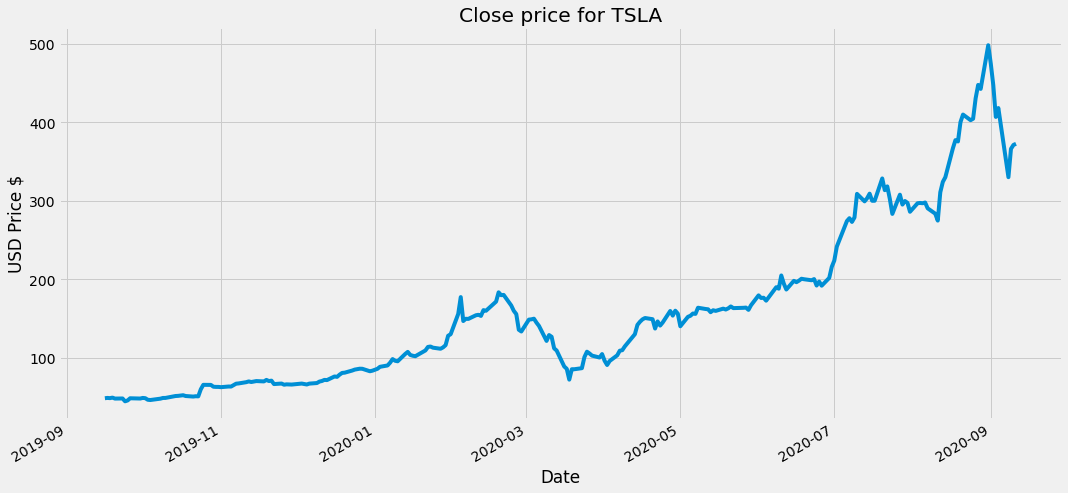

In [16]:
# visually show the close price
df['Close'].plot(figsize=(16,8))
plt.title('Close price for TSLA')
plt.ylabel('USD Price $')
plt.xlabel('Date')
plt.show()

In [17]:
# create a function to calculate the DEMA
def DEMA(data, time_period, column):
    # calc the EMA for the time period
    EMA = data[column].ewm(span=time_period, adjust=False).mean()
    # calc the DEMA
    DEMA = 2 * EMA - EMA.ewm(span=time_period, adjust=False).mean()

    return DEMA 

In [18]:
# Store the short term DEMA (20 day) and the long term DEMA (50 day)
df['DEMA-Short'] = DEMA(df, 20, 'Close')
df['DEMA-Long'] = DEMA(df, 50, 'Close')

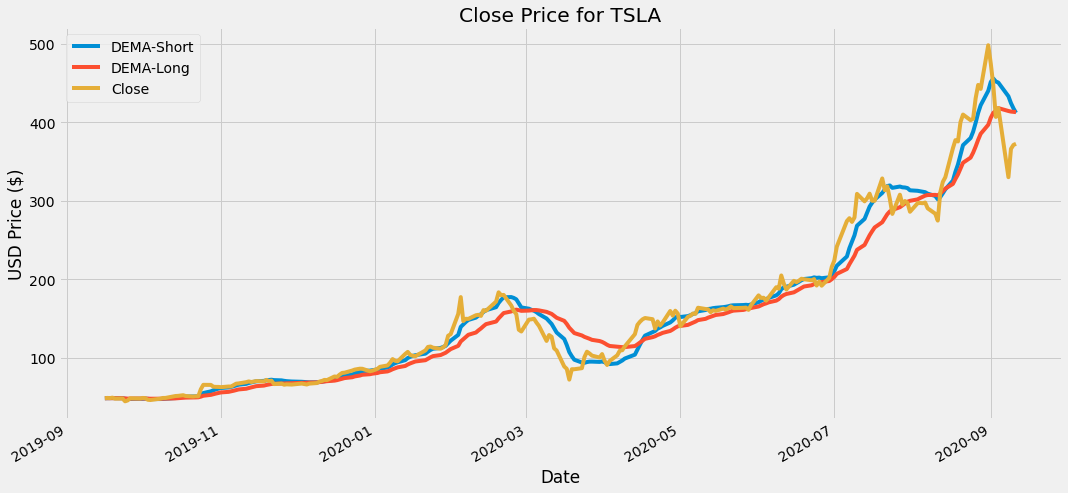

In [19]:
# plot chart and create list of columns to keep
column_list = ['DEMA-Short', 'DEMA-Long', 'Close']
df[column_list].plot(figsize=(16,8))
plt.title('Close Price for TSLA')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show()

In [20]:
# Create a function to buy or sell the stock
def DEMA_Strategy(data):
    buy_list = []
    sell_list = []
    flag = False
    #loop through the data
    for i in range(0, len(data)):
        if data['DEMA-Short'][i] > data['DEMA-Long'][i] and flag == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag = True 
        elif data['DEMA-Short'][i] < data['DEMA-Long'][i] and flag == True:
            buy_list.append(np.nan)
            sell_list.append(data['Close'][i])
            flag = False 
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    
    #Store the buy/sell signals into data sets
    data['Buy'] = buy_list
    data['Sell'] = sell_list

In [21]:
# run it
DEMA_Strategy(df)

In [22]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,DEMA-Short,DEMA-Long,Buy,Sell
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500,48.562000,48.562000,NaN,NaN
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000,48.633837,48.592450,48.958,NaN
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000,48.648417,48.601128,NaN,NaN
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000,48.773636,48.657116,NaN,NaN
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000,48.664134,48.617853,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900,450.719496,418.218026,NaN,NaN
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700,433.260568,414.543693,NaN,NaN
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800,424.577406,413.795747,NaN,NaN
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600,417.858559,413.421322,NaN,NaN


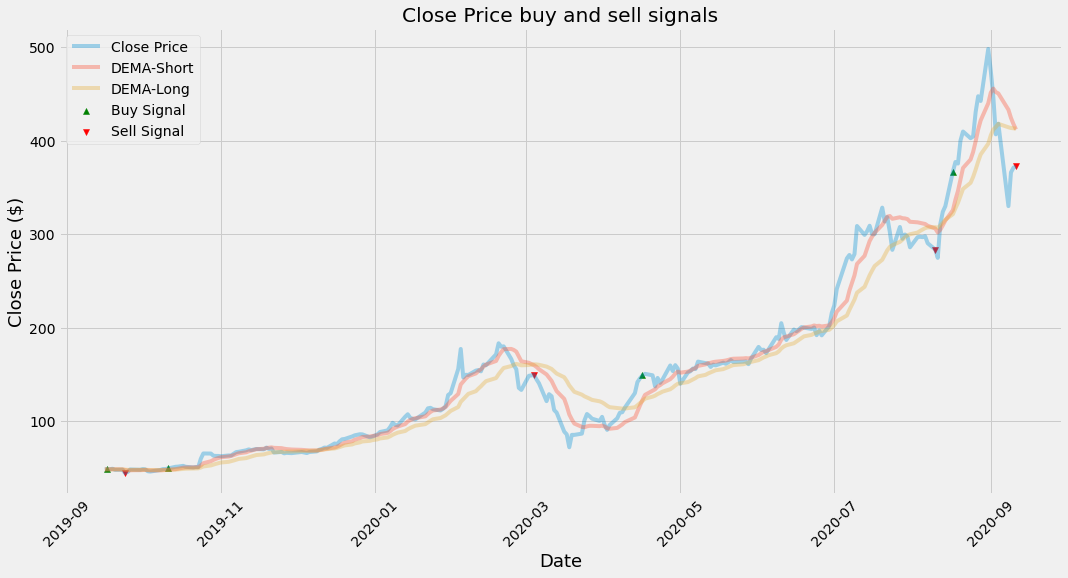

In [29]:
# visually show the buy and sell signals
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.plot(df['DEMA-Short'], label='DEMA-Short', alpha=0.35)
plt.plot(df['DEMA-Long'], label='DEMA-Long', alpha=0.35)
plt.scatter(df.index, df['Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.xticks(rotation=45)
plt.title('Close Price buy and sell signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()